In [1]:
# ref: ucb1.py

In [3]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt
from comparing_epsilons import run_experiment as run_experiment_eps

In [4]:
class Bandit:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0

    def pull(self):
        return np.random.randn() + self.m

    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x


In [5]:
def ucb(mean, n, nj):
    if nj == 0:
        return float('inf')
    return mean + np.sqrt(2*np.log(n) / nj)

In [6]:
def run_experiment(m1, m2, m3, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

    data = np.empty(N)
    
    for i in range(N):
        j = np.argmax([ucb(b.mean, i+1, b.N) for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # for b in bandits:
    #   print("bandit nj:", b.N)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    # for b in bandits:
    #   print(b.mean)

    return cumulative_average

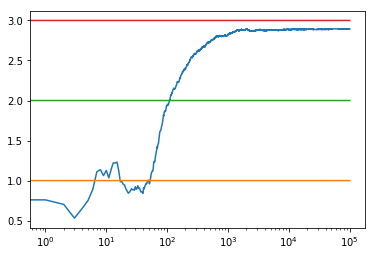

0.976370806354
1.98297765017
2.99838369692


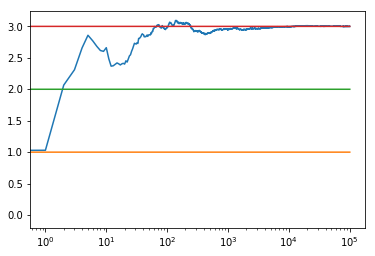

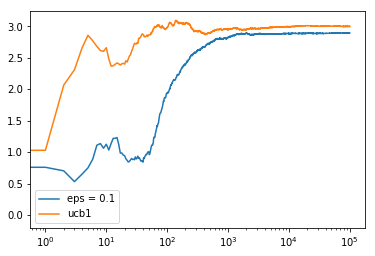

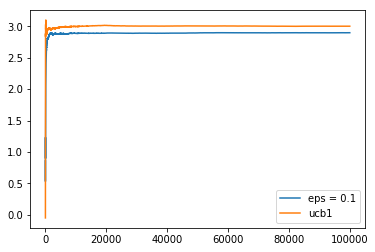

In [7]:
if __name__ == '__main__':
    eps = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)
    ucb = run_experiment(1.0, 2.0, 3.0, 100000)

    # log scale plot
    plt.plot(eps, label='eps = 0.1')
    plt.plot(ucb, label='ucb1')
    plt.legend()
    plt.xscale('log')
    plt.show()


    # linear plot
    plt.plot(eps, label='eps = 0.1')
    plt.plot(ucb, label='ucb1')
    plt.legend()
    plt.show()